# メイン2

## 昨日のレース結果を更新する

In [5]:
# 最新のレース結果をダウンロードする
import download_race_data as dl_race
import importlib
import datetime as dt
importlib.reload(dl_race)

start_date = dt.datetime.strptime('2022-11-01', '%Y-%m-%d')
# start_date = dt.datetime.strptime('2023-01-01', '%Y-%m-%d')

yesterday_date = dt.datetime.now() - dt.timedelta(1)
dl_race.download_race_data(start_date, yesterday_date)

# 
dl_race.test()

# テーブルを作成
import create_tables
importlib.reload(create_tables)

data_tables = create_tables.DataTables(need_update=True) # need_update (最新のtxtを既存のpickleのテーブルをくっつける)
# data_tables = create_tables.DataTables(update_all=True) # テーブル構造を変えたときや一番はじめはこっちを実行

data_tables.test()

download_race_data: テスト成功


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1050/1050 [00:10<00:00, 104.58it/s]


RaceTables:テスト成功


In [6]:
# テーブル確認
data_tables.merged_t

,レースコード,スタジアムコード,日付,着順,艇番,登録番号,選手名,モーター番号,ボート番号,展示タイム,...,全国_3着率_all,全国_3着率_10,当地_1着率_all,当地_1着率_10,当地_3着率_all,当地_3着率_10,コース別_1着率_all,コース別_1着率_10,コース別_3着率_all,コース別_3着率_10
0,20230101OMR01,OMR,2023-01-01 01:00:00,1,1,5022,伊藤尚汰,44,32,6.86,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,20230101OMR01,OMR,2023-01-01 01:00:00,2,2,4004,山本浩輔,23,19,6.90,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,20230101OMR01,OMR,2023-01-01 01:00:00,3,5,4874,池田奈津美,22,67,6.95,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,20230101OMR01,OMR,2023-01-01 01:00:00,4,4,5219,森口和紀,53,85,6.93,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,20230101OMR01,OMR,2023-01-01 01:00:00,5,6,5274,城間盛渚,81,56,6.93,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3523,20230103KRY12,KRY,2023-01-03 12:00:00,2,3,3406,中里英夫,63,69,6.85,...,0.666667,0.666667,0.333333,0.333333,0.666667,0.666667,0.0,0.0,0.0,0.0
3524,20230103KRY12,KRY,2023-01-03 12:00:00,3,2,4888,金児隆太,57,62,6.81,...,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.0,0.0,0.0,0.0
3525,20230103KRY12,KRY,2023-01-03 12:00:00,4,4,3475,橋本久和,70,65,6.82,...,1.000000,1.000000,0.333333,0.333333,1.000000,1.000000,0.0,0.0,0.0,0.0
3526,20230103KRY12,KRY,2023-01-03 12:00:00,5,6,4637,中田友也,33,12,6.84,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.0,0.0,0.0


In [4]:
# テーブルの構成を変えたときにすべて最初からやり直す

# importlib.reload(create_tables)
# importlib.reload(utils)
# date_tables = create_tables.DataTables(update_all=True)
# data_tables.test()

## ここからシミュレーションプログラム

In [584]:
import race_results as rr
import return_table as rt
import syusso_table as sy
import model_evaluator as mev
import importlib
import create_tables
import utils
importlib.reload(create_tables)
importlib.reload(rr)
importlib.reload(rt)
importlib.reload(sy)
importlib.reload(mev)
importlib.reload(utils)

data_tables = create_tables.DataTables()
race_results = rr.RaceResults(data_tables.merged_t)
return_table = rt.ReturnTable(data_tables.return_t)

race_d = race_results.generate_categorical()

# 会場で絞ってみる 
race_d = utils.filter_stadium(race_d, 'OMR')

0it [00:00, ?it/s]


In [585]:
import utils
importlib.reload(utils)


# レース結果を訓練データと予測データに分けてシミュレーション
train, test = utils.split_data(race_d)

# X_train = train.drop(["rank"], axis=1)
# y_train = train["rank"]
# X_test = test.drop(["rank"], axis=1)
# y_test = test["rank"]
X_train = train.drop(["rank", "艇番"], axis=1)
y_train = train["rank"]
X_test = test.drop(["rank", "艇番"], axis=1)
y_test = test["rank"]

#LightGBMによる予測モデル作成
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

params = {
    "num_leaves": 4,
    "n_estimators": 80,
    "class_weight": "balanced",
    "random_state": 100,
}
lgb_clf = lgb.LGBMClassifier(**params)
lgb_clf.fit(X_train.values, y_train.values)

# me_t.score(y_test, X_test)

LGBMClassifier(class_weight='balanced', n_estimators=80, num_leaves=4,
               random_state=100)

In [586]:
importlib.reload(mev)
me_f= mev.ModelEvaluator(lgb_clf, return_table.data_p, std=False)
me_t = mev.ModelEvaluator(lgb_clf, return_table.data_p, std=True)

In [587]:
# テストモデルのレース数 / 6船 = 1レースに1枚買った枚数
# それに0.7(適当)掛けた枚数を最低購入数とする
min_buy_num = len(X_test.index.unique())/6 * 0.5
print("全データ数", len(race_results.data_p))
print("平和島全データ数", len(race_d))
print("テストデータ数", len(X_test))
print("レース数", len(X_test.index.unique()))
print("1レースに1舟券掛けたら買う枚数", len(X_test.index.unique())/6)
print("最低購入枚数", min_buy_num)

gain_f = mev.Gain(me_f, X_test, test, return_table.data_p, lower=min_buy_num, n_samples=100)
gain_t = mev.Gain(me_t, X_test, test, return_table.data_p, lower=min_buy_num, n_samples=100)

全データ数 652913
平和島全データ数 28232
テストデータ数 8472
レース数 1433
1レースに1舟券掛けたら買う枚数 238.83333333333334
最低購入枚数 119.41666666666667


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:31<00:00,  3.16it/s]


In [588]:
# predテーブルの表示
# me_t.pred_table(X_test, test, 0.5, False)

In [589]:
# 実際の出走テーブルを使って予測しpredテーブルを表示

# importlib.reload(mev)
# me_f= mev.ModelEvaluator(lgb_clf, return_table.data_p, std=False)
# me_t = mev.ModelEvaluator(lgb_clf, return_table.data_p, std=True)

# import syusso_table as sy
# importlib.reload(sy)
# syusso = sy.SyussoTable('20221229', 'OMR')
# syusso_d = syusso.generate_categorical(race_results)

# me_t.pred_table(syusso_d.drop(['艇番'], axis=1), syusso_d, 0.7, True)

In [578]:
utils.begin_display_row_num()

In [569]:
utils.end_display_row_num()

In [590]:
# フューチャーインポータんすの表示
# me_t.feature_importance(X_test)

In [591]:
importlib.reload(mev)
gain_f_tansho = gain_f.calc_return(mev.win_return)
gain_f_fukusho = gain_f.calc_return(mev.place_return)
gain_t_tansho = gain_t.calc_return(mev.win_return)
gain_t_fukusho = gain_t.calc_return(mev.place_return)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.79it/s]


In [592]:
importlib.reload(mev)
gain_t_exacta = gain_t.calc_return(mev.exacta_return)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:23<00:00,  1.19it/s]


<AxesSubplot: >

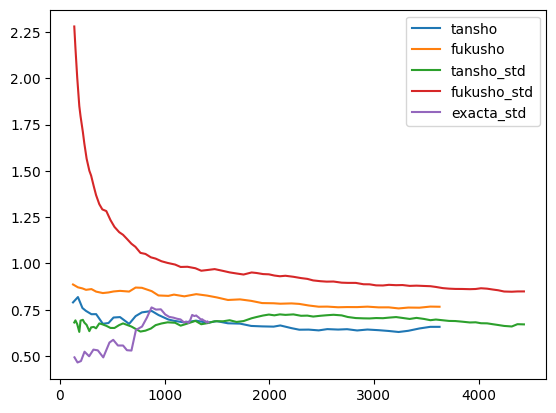

In [593]:
gain_f_tansho.rename('tansho').plot(legend=True)
gain_f_fukusho.rename('fukusho').plot(legend=True)
gain_t_tansho.rename('tansho_std').plot(legend=True)
gain_t_fukusho.rename('fukusho_std').plot(legend=True)
gain_t_exacta.rename('exacta_std').plot(legend=True)

In [ ]:
# 回収率の最大値
gain_t_tansho.max()

1.0593548387096774

In [595]:
gain_t_fukusho.max()
show_recovery_rates(gain_t_fukusho, 0.79)

4433 0.8490412812993459
4371 0.8488904140928849
4317 0.847324530924253
4244 0.848468426013195
4187 0.8552901839025555
4135 0.8592986698911729
4081 0.8638814016172507
4023 0.866094954014417
3972 0.8621097683786505
3917 0.8611437324483022
3842 0.8622332118688183
3778 0.8624669137109582
3718 0.8639591178052717
3658 0.8668398031711317
3592 0.8731347438752785
3540 0.8771468926553673
3479 0.8784708249496982
3407 0.8801878485471089
3342 0.8789048473967684
3273 0.8834708218759548
3212 0.8826899128268991
3143 0.8846006999681832
3086 0.8810758263123785
3021 0.8817279046673288
2958 0.8873563218390804
2901 0.8876594277835229
2827 0.8950477538026176
2751 0.8951290439840058
2692 0.8962852897473997
2614 0.9024483550114767
2549 0.9018830914083954
2490 0.9041767068273092
2420 0.9084297520661156
2364 0.916751269035533
2304 0.9210503472222222
2231 0.9281039892424922
2155 0.9335962877030163
2102 0.9309229305423407
2049 0.9348462664714495
1997 0.9413620430645969
1941 0.9427099433281814
1880 0.9485106382978

In [620]:
# ある回収率以上の購入数を表示
def show_recovery_rates(gain, threshold=1):
    for idx in gain.index:
            if gain[idx] > threshold:
                print(idx, gain[idx]) 


show_recovery_rates(gain_t_fukusho, 1)

1029 1.0030126336248786
971 1.0120494335736354
915 1.0263387978142076
870 1.0332183908045978
818 1.0514669926650366
770 1.0572727272727274
722 1.0898891966759003
684 1.106578947368421
642 1.1322429906542055
604 1.1548013245033113
567 1.1691358024691358
522 1.1975095785440613
484 1.234297520661157
444 1.2831081081081082
406 1.2921182266009852
377 1.320424403183024
346 1.3696531791907514
324 1.4172839506172838
299 1.4745819397993312
282 1.501063829787234
256 1.566015625
234 1.6487179487179486
220 1.7104545454545454
198 1.7949494949494949
186 1.8505376344086022
166 2.005421686746988
149 2.1651006711409395
138 2.2804347826086957


In [621]:
# gain_t_tansho
def get_gain_pred_tables(gain, target_n_bets):
    pred_table = {}
    for threshold in gain.pred_tables:
        n_bets = len(gain.pred_tables[threshold])
        # print(len(gain_t.pred_tables[threshold]))
        
        if n_bets == target_n_bets:
            pred_table = gain.pred_tables[threshold]
            print('threshold', threshold)
            
    if len(pred_table) == 0:
        print("pred_tableがみつからない")
        return

    n_bets = len(pred_table)
    money = -100*n_bets
    df = gain.return_table.copy()
    df = df.merge(pred_table, left_index=True, right_index=True, how='right')
    
    payoff_list = mev.win_payoff_list(df)
    # payoff_list = mev.place_payoff_list(df)
    
    return payoff_list
            

In [622]:
# 1500円以上の単勝を表示
payoff_list = get_gain_pred_tables(gain_t, 138)
win = payoff_list[0]
for idx in win.index:
    if(win[idx] > 0):
        print(utils.create_race_result_url(idx), win[idx])

threshold 0.905
https://www.boatrace.jp/owpc/pc/race/racelist?rno=08&jcd=24&hd=20220526 110
https://www.boatrace.jp/owpc/pc/race/racelist?rno=02&jcd=24&hd=20220528 150
https://www.boatrace.jp/owpc/pc/race/racelist?rno=10&jcd=24&hd=20220601 160
https://www.boatrace.jp/owpc/pc/race/racelist?rno=11&jcd=24&hd=20220603 110
https://www.boatrace.jp/owpc/pc/race/racelist?rno=03&jcd=24&hd=20220604 270
https://www.boatrace.jp/owpc/pc/race/racelist?rno=08&jcd=24&hd=20220605 100
https://www.boatrace.jp/owpc/pc/race/racelist?rno=08&jcd=24&hd=20220606 120
https://www.boatrace.jp/owpc/pc/race/racelist?rno=03&jcd=24&hd=20220609 470
https://www.boatrace.jp/owpc/pc/race/racelist?rno=02&jcd=24&hd=20220610 430
https://www.boatrace.jp/owpc/pc/race/racelist?rno=09&jcd=24&hd=20220611 710
https://www.boatrace.jp/owpc/pc/race/racelist?rno=12&jcd=24&hd=20220613 100
https://www.boatrace.jp/owpc/pc/race/racelist?rno=11&jcd=24&hd=20220617 100
https://www.boatrace.jp/owpc/pc/race/racelist?rno=08&jcd=24&hd=20220618 

## 実験

In [1345]:
def get_gain_pred_tables2(gain, target_n_bets):
    pred_table = {}
    for threshold in gain.pred_tables:
        n_bets = len(gain.pred_tables[threshold])
        # print(len(gain_t.pred_tables[threshold]))
        
        if n_bets == target_n_bets:
            pred_table = gain.pred_tables[threshold]
            
    if len(pred_table) == 0:
        print("pred_tableがみつからない")
        return
    
    return pred_table

#     n_bets = len(pred_table)
#     money = -100*n_bets
#     df = gain.return_table.copy()
#     df = df.merge(pred_table, left_index=True, right_index=True, how='right')
    
#     payoff_list = mev.win_payoff_list(df)
    
#     return payoff_list
pred_table = get_gain_pred_tables2(gain_t, 1363)
pred_table

,艇番,pred,bet
レースコード,,,
20220426TKN01,2,0.747290,1
20220426TKN05,2,0.801143,1
20220426TKN05,6,0.813691,1
20220426TKN04,5,0.750074,1
20220429TKN09,1,0.753371,1
...,...,...,...
20221123TKN10,1,0.799153,1
20221123TKN11,1,0.771474,1
20221123TKN04,6,0.881821,1


In [1253]:
race_codes = pred_table.index.unique()
# count=0

def pred_table_exacta_top_2(pred_table):
    # 新しくpred_tableをコピーしexacta行をつける
    exacta_pred_table = pred_table.copy()
    exacta_pred_table['exacta'] = '' * len(pred_table)

    # レースコードの数だけ試行
    for race_code in exacta_pred_table.index.unique():

        race_pred_table = pred_table.filter(regex=race_code, axis=0)
        if(len(race_pred_table) >= 2):
            # print(race_pred_table.sort_values('pred', ascending=False))
            # pred値が高い順にソートし、top2つだけ選ぶ
            race_pred_table = race_pred_table.sort_values('pred', ascending=False)[:2]
            exacta_bet = race_pred_table['艇番'].tolist()

            exacta_bet_str = '-'.join(map(str, exacta_bet))
            data = [''] * len(race_pred_table)
            data[0] = exacta_bet_str
            exacta_pred_table.loc[race_code, 'exacta'] = data


    exacta_pred_table = exacta_pred_table
    exacta_pred_table = exacta_pred_table[exacta_pred_table['exacta'] != '']
    
    return exacta_pred_table
    
        
        
    #     print(a)
    #     print('----')
    
# pred_table.loc['20220426TKN05']]['exacta'] = 1
# exacta_pred_table.loc['20220426TKN05'].iloc[0]['exacta'] = 1
# exacta_pred_table.loc['20220426TKN05', 'exacta'] = ['test', '']
# exacta_pred_table.loc['20220426TKN05', 'exacta'] = 1

In [1346]:
importlib.reload(utils)
hoge = pred_table_exacta_1(pred_table)
hoge
# utils.begin_display_row_num()

,艇番,pred,bet,exacta
レースコード,,,,
20220426TKN05,2,0.801143,1,6-2
20220429TKN11,3,0.797124,1,4-3
20220429TKN06,3,0.745292,1,4-3
20220501TKN08,2,0.749894,1,5-2
20220503TKN07,1,0.766249,1,1-5
...,...,...,...,...
20221121TKN09,1,0.790897,1,3-1
20221121TKN03,4,0.756511,1,2-4
20221121TKN04,3,0.780402,1,2-3


In [1421]:
importlib.reload(mev)
n_bets, money = mev.exacta_return(pred_table, return_table.data_p)
print(n_bets, money)

188 -9900


In [1418]:
importlib.reload(mev)
def exacta_return(pred_table, return_table, buy_func=mev.pred_table_exacta_top_2):
    df = return_table.copy() 
    
    df_p = buy_func(pred_table.copy())
    df = df.merge(df_p, left_index=True, right_index=True, how='right')
    
    n_bets = len(df)
    money = -100 * n_bets
       
    payoff_list = mev.exacta_payoff_list(df)   
    return payoff_list[0]
    
exacta_return(pred_table, return_table.data_p)

レースコード
20220503TKN07     270
20220519TKN07     390
20220520TKN01     450
20220603TKN09     700
20220607TKN07     300
20220619TKN10     170
20220619TKN05     630
20220719TKN09     660
20220730TKN10     190
20220731TKN05     130
20220821TKN12     270
20220823TKN03     500
20220913TKN07     740
20221016TKN06     140
20221104TKN06     490
20221105TKN11     180
20221114TKN09    1760
20221114TKN06     930
Name: 2連単_払戻金, dtype: int64

In [1380]:
df[df['winning']]['2連単_払戻金']

レースコード
20220503TKN07     270
20220519TKN07     390
20220520TKN01     450
20220603TKN09     700
20220607TKN07     300
20220619TKN10     170
20220619TKN05     630
20220719TKN09     660
20220730TKN10     190
20220731TKN05     130
20220821TKN12     270
20220823TKN03     500
20220913TKN07     740
20221016TKN06     140
20221104TKN06     490
20221105TKN11     180
20221114TKN09    1760
20221114TKN06     930
Name: 2連単_払戻金, dtype: int64

In [1447]:
# hoge = race_data
test = data_tables.race_t.head(1000)

In [4]:
test['登録番号'].nunique()
data_tables.race_t['登録番号'].nunique()

NameError: name 'test' is not defined

,レースコード,スタジアムコード,日付,着順,艇番,登録番号,選手名,モーター番号,ボート番号,展示タイム,進入コース,スタートタイミング,レースタイム,距離(m),天候,風向,風速(m),波の高さ(cm),決まり手
0,20210101OMR01,OMR,2021-01-01,1,1,4708,半田尚也,30,33,6.81,1.0,0.08,109.1,1800,曇り,北,2,1,逃げ
1,20210101OMR01,OMR,2021-01-01,2,3,4948,木場悠介,33,13,6.90,3.0,0.12,110.1,1800,曇り,北,2,1,逃げ
2,20210101OMR01,OMR,2021-01-01,3,4,5009,大賀龍之介,46,64,6.85,4.0,0.12,112.1,1800,曇り,北,2,1,逃げ
3,20210101OMR01,OMR,2021-01-01,4,6,4750,井上尚悟,66,75,6.81,5.0,0.11,113.1,1800,曇り,北,2,1,逃げ
4,20210101OMR01,OMR,2021-01-01,5,2,5053,山口広樹,31,47,6.92,2.0,0.13,NaN,1800,曇り,北,2,1,逃げ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3811,20221231KRY12,KRY,2022-12-31,2,5,4875,大塚康雅,40,64,6.79,5.0,0.21,110.1,1800,晴,西,1,1,逃げ
3812,20221231KRY12,KRY,2022-12-31,3,3,4847,佐藤隆太郎,39,14,6.67,3.0,0.17,110.1,1800,晴,西,1,1,逃げ
3813,20221231KRY12,KRY,2022-12-31,4,2,4366,前沢丈史,44,52,6.72,2.0,0.20,111.1,1800,晴,西,1,1,逃げ
3814,20221231KRY12,KRY,2022-12-31,5,6,3463,乙津康志,46,75,6.78,6.0,0.25,114.1,1800,晴,西,1,1,逃げ


In [259]:
import pandas as pd
from tqdm import tqdm
from datetime import datetime

# レーステーブルをレーサーごとに分けるj
def create_racer_array(result_table):
    li = {}
    for no in result_table['登録番号'].unique():
        li[no] = result_table[result_table['登録番号'] == no]
    return li

def create_racer_table(source_df, past_data, need_update=False):
    racer_df = pd.DataFrame()
    target = source_df

    # 既存のテーブルを使う場合
    if need_update == False:
        # pickleから復元
        racer_df = past_data
        # 既存のテーブルに含まれていないレースコードのデータのみ抽出
        target = source_df[~source_df["レースコード"].isin(racer_df['レースコード'])]

    test = create_racer_array(target) 
    source = create_racer_array(source_df)

    for racer_id in tqdm(test):
        new_df = test[racer_id].copy()
        # 過去データ参照するとき用に順位に文字が入っているのを飛ばす (飛ばすのか変換するのか悩みどころ)
        source_racer = source[racer_id].copy()
        source_racer['tmp'] = source_racer['着順'].map(lambda x: type(x) == int)
        source_racer = source_racer[source_racer['tmp']==True].drop(['tmp'], axis=1)
        source_racer['着順'] = source_racer['着順'].astype(int)

        for i, row in new_df.iterrows():
            # 着順を計算するラムダ
            calc_top1_proba = lambda df: 0 if len(df) == 0 else len(df[df['着順'] == 1])/len(df)
            calc_top3_proba = lambda df: 0 if len(df) == 0 else len(df[df['着順'] <= 3])/len(df)

            # 対象となるレース以前の日付のみのデータに
            source_prev = source_racer[source_racer['日付'] < row['日付']]
            stadium_code = row['スタジアムコード']
            teiban = row['艇番']

            # 全データ/会場/艇番 で絞ったその選手の過去データ
            all_df     = source_prev
            stadium_df = source_prev[source_prev['スタジアムコード'] == stadium_code]
            teiban_df  = source_prev[source_prev['艇番'] == teiban]

            # 全データの1着率,3着率の計算
            all_top1    = calc_top1_proba(all_df)
            all_top1_10 = calc_top1_proba(all_df.tail(10))
            all_top3    = calc_top3_proba(all_df)
            all_top3_10 = calc_top3_proba(all_df.tail(10))
            # スタジアムのデータの1着率,3着率の計算
            stadium_top1    = calc_top1_proba(stadium_df)
            stadium_top1_10 = calc_top1_proba(stadium_df.tail(10))
            stadium_top3    = calc_top3_proba(stadium_df)
            stadium_top3_10 = calc_top3_proba(stadium_df.tail(10))
            # コース別のデータの1着率,3着率の計算
            teiban_top1    = calc_top1_proba(teiban_df)
            teiban_top1_10 = calc_top1_proba(teiban_df.tail(10))
            teiban_top3    = calc_top3_proba(teiban_df)
            teiban_top3_10 = calc_top3_proba(teiban_df.tail(10))

            new_df.at[i, '全国_1着率_all'] = all_top1
            new_df.at[i, '全国_1着率_10'] = all_top1_10
            new_df.at[i, '全国_3着率_all'] = all_top3
            new_df.at[i, '全国_3着率_10'] = all_top3_10

            new_df.at[i, '当地_1着率_all'] = stadium_top1 
            new_df.at[i, '当地_1着率_10'] = stadium_top1_10 
            new_df.at[i, '当地_3着率_all'] = stadium_top3
            new_df.at[i, '当地_3着率_10'] = stadium_top3_10 

            new_df.at[i, 'コース別_1着率_all'] = teiban_top1 
            new_df.at[i, 'コース別_1着率_10'] = teiban_top1_10 
            new_df.at[i, 'コース別_3着率_all'] = teiban_top3
            new_df.at[i, 'コース別_3着率_10'] = teiban_top3_10 

        racer_df = pd.concat([racer_df, new_df])
        
    return racer_df

In [262]:
create_racer_table(data_tables.race_t, pd.read_pickle("pic_racer_table"))

100%|████████████████████████████████████████████████████████████████████████████████| 789/789 [00:54<00:00, 14.39it/s]


,レースコード,スタジアムコード,日付,着順,艇番,登録番号,選手名,モーター番号,ボート番号,展示タイム,...,全国_3着率_all,全国_3着率_10,当地_1着率_all,当地_1着率_10,当地_3着率_all,当地_3着率_10,コース別_1着率_all,コース別_1着率_10,コース別_3着率_all,コース別_3着率_10
0,20210101OMR01,OMR,2021-01-01 01:00:00,1,1,4708,半田尚也,30,33,6.81,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
34,20210101OMR06,OMR,2021-01-01 06:00:00,5,4,4708,半田尚也,30,33,6.82,...,1.000000,1.000000,1.000000,1.0,1.000000,1.0,0.000000,0.0,0.000000,0.0
9797,20210110MYJ02,MYJ,2021-01-10 02:00:00,6,2,4708,半田尚也,63,59,6.61,...,0.500000,0.500000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
10797,20210111MYJ01,MYJ,2021-01-11 01:00:00,4,3,4708,半田尚也,63,59,6.70,...,0.333333,0.333333,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
10832,20210111MYJ07,MYJ,2021-01-11 07:00:00,3,6,4708,半田尚也,63,59,6.68,...,0.250000,0.250000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662971,20221231KRY12,KRY,2022-12-31 12:00:00,2,5,4875,大塚康雅,40,64,6.79,...,0.462103,0.600000,0.235294,0.3,0.647059,0.8,0.044118,0.1,0.352941,0.5
662972,20221231KRY12,KRY,2022-12-31 12:00:00,3,3,4847,佐藤隆太郎,39,14,6.67,...,0.663793,1.000000,0.294872,0.6,0.679487,1.0,0.236111,0.1,0.722222,0.7
662973,20221231KRY12,KRY,2022-12-31 12:00:00,4,2,4366,前沢丈史,44,52,6.72,...,0.690476,0.700000,0.320513,0.7,0.679487,0.7,0.172043,0.1,0.655914,0.5
662974,20221231KRY12,KRY,2022-12-31 12:00:00,5,6,3463,乙津康志,46,75,6.78,...,0.510152,0.400000,0.102041,0.1,0.510204,0.6,0.000000,0.0,0.271186,0.2


In [263]:
racer_df = racer_df[racer_df['日付'] < datetime(2022, 12, 31)]
racer_df.to_pickle("pic_racer_table")

In [152]:
racer_df[~racer_df["レースコード"].isin(data_tables.race_t['レースコード'])]

,レースコード,スタジアムコード,日付,着順,艇番,登録番号,選手名,モーター番号,ボート番号,展示タイム,進入コース,スタートタイミング,レースタイム,距離(m),天候,風向,風速(m),波の高さ(cm),決まり手


In [237]:
len(data_tables.race_t)

662976

In [238]:
len(racer_df)

662976

In [205]:
len(racer_df[racer_df.duplicated()])

305185

In [243]:
racer_df.count()

レースコード          662976
スタジアムコード        662976
日付              662976
着順              662976
艇番              662976
登録番号            662976
選手名             662976
モーター番号          662976
ボート番号           662976
展示タイム           661469
進入コース           661379
スタートタイミング       661379
レースタイム          498485
距離(m)           662976
天候              662976
風向              662976
風速(m)           662976
波の高さ(cm)        662976
決まり手            662976
全国_1着率_all      662976
全国_1着率_10       662976
全国_3着率_all      662976
全国_3着率_10       662976
当地_1着率_all      662976
当地_1着率_10       662976
当地_3着率_all      662976
当地_3着率_10       662976
コース別_1着率_all    662976
コース別_1着率_10     662976
コース別_3着率_all    662976
コース別_3着率_10     662976
dtype: int64

In [252]:
processed_racer_df = racer_df.drop(['スタジアムコード', '日付', '着順', '登録番号', '選手名', 'モーター番号', 'ボート番号', '展示タイム', '進入コース', 'スタートタイミング', 'レースタイム', '距離(m)', '天候', '風向', '風速(m)', '波の高さ(cm)', '決まり手'], axis=1)
processed_racer_df
# processed_racer_df = racer_df.drop(['スタジアムコード'], axis=1)

,レースコード,艇番,全国_1着率_all,全国_1着率_10,全国_3着率_all,全国_3着率_10,当地_1着率_all,当地_1着率_10,当地_3着率_all,当地_3着率_10,コース別_1着率_all,コース別_1着率_10,コース別_3着率_all,コース別_3着率_10
0,20210101OMR01,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
34,20210101OMR06,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,0.000000,0.0,0.000000,0.0
9797,20210110MYJ02,2,0.500000,0.500000,0.500000,0.500000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
10797,20210111MYJ01,3,0.333333,0.333333,0.333333,0.333333,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
10832,20210111MYJ07,6,0.250000,0.250000,0.250000,0.250000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662971,20221231KRY12,5,0.146699,0.300000,0.462103,0.600000,0.235294,0.3,0.647059,0.8,0.044118,0.1,0.352941,0.5
662972,20221231KRY12,3,0.262931,0.700000,0.663793,1.000000,0.294872,0.6,0.679487,1.0,0.236111,0.1,0.722222,0.7
662973,20221231KRY12,2,0.282051,0.600000,0.690476,0.700000,0.320513,0.7,0.679487,0.7,0.172043,0.1,0.655914,0.5
662974,20221231KRY12,6,0.121827,0.000000,0.510152,0.400000,0.102041,0.1,0.510204,0.6,0.000000,0.0,0.271186,0.2


In [256]:
hoge = pd.merge(data_tables.race_t, processed_racer_df, on=['レースコード', '艇番'])

In [257]:
hoge.count()

レースコード          662976
スタジアムコード        662976
日付              662976
着順              662976
艇番              662976
登録番号            662976
選手名             662976
モーター番号          662976
ボート番号           662976
展示タイム           661469
進入コース           661379
スタートタイミング       661379
レースタイム          498485
距離(m)           662976
天候              662976
風向              662976
風速(m)           662976
波の高さ(cm)        662976
決まり手            662976
全国_1着率_all      662976
全国_1着率_10       662976
全国_3着率_all      662976
全国_3着率_10       662976
当地_1着率_all      662976
当地_1着率_10       662976
当地_3着率_all      662976
当地_3着率_10       662976
コース別_1着率_all    662976
コース別_1着率_10     662976
コース別_3着率_all    662976
コース別_3着率_10     662976
dtype: int64

In [148]:
df.to_pickle("pic_racer_table")

In [1676]:
calc_top1_proba = lambda df: len(df[df['着順'] == 1])/len(df)
calc_top3_proba = lambda df: len(df[df['着順'] <= 3])/len(df)
# calc_top3_proba = lambda df: df['着順'].value_counts().loc[0:3].sum()/len(df)
calc_top1_proba(all_df)
calc_top3_proba(all_df)
# all_df['着順'].value_counts().loc[1].sum()

0.6726907630522089

In [1670]:
df['着順'].value_counts()

1    131
2    114
3     88
4     78
5     59
6     26
Name: 着順, dtype: int64

In [1639]:


all_df['着順'].value_counts()

1    133
2    114
3     88
4     78
5     59
6     26
Name: 着順, dtype: int64

In [1655]:
len(all_df)

498